# Inferential statistics
## Part III - Inferential Analysis

We're now going to look for answers to the ongoing basketball discussions between you and your family. The main ones we want to reasearch are the following:

- Your grandmother says that your sister couldn't play in a professional basketball league (not only the WNBA, but ANY professional basketball league) because she's too skinny and lacks muscle.
- Your sister says that most female professional players fail their free throws.
- Your brother-in-law heard on the TV that the average assists among NBA (male) and WNBA (female) players is 52 for the 2016-2017 season. He is convinced this average would be higher if we only considered the players from the WNBA.

Let's investigate these claims and see if we can find proof to refute or support them.

### Libraries
Import the necessary libraries first.

In [26]:
# Libraries
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
pd.set_option('max_columns', 50)
from scipy.stats import wilcoxon

### Load the dataset

Load the cleaned dataset.

In [3]:
ds = pd.read_csv('wnba_clean.csv')
ds.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0


# Question 1: Can my sister play in a professional female basketball league?

As we said, you grandmother is convinced that your sister couldn't play in a professional league because of her physique and weight (her weight is 67kg). 

To find an actual answer to the question we first need to know what's the average weight of a professional female basketball player. The data we have only refers to the WNBA league and not to every female professional basketball league in the world, therefore we have no way of actually calculating it.

Still, given that we do have *some* data we can **infer** it using a sample of players like the one we have. 

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the average weight. Do you feel it actually fulfills those requirements? Do you need to make any assumptions? We could calculate a confidence interval to do the inference, but do you know any other ways?**

In [11]:
"""As I know nothing of basketbal, but I have the idea that the WNBA is one of the highest levels around the world, I would 
say that taking this group as a sample would be a good way to convince grandma about the fact that it could be possible."""

In [ ]:
""""At least 30 measurments make that we can do an analysis, which we have but if I could I would look for more players
and especially the players in the country we are having this discussion about I would be happy with a minimum sample 
of 1000""""

"""""Looking at the sample it is kinda normally distributed, but there are some outliers in the lighter catergory. So
alternativly I would use a wilcoxon just to check. 

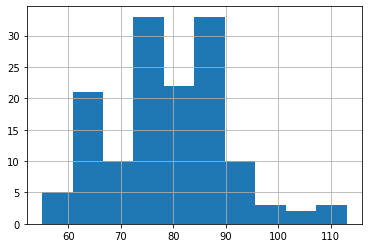

In [22]:
ds['Weight'].hist()

**Now that all the requirements have been taken into account, compute the confidence interval of the average weight with a confidence level of 95%.**

In [4]:
ttest_1samp(ds['Weight'].dropna(), 67)

Ttest_1sampResult(statistic=12.981385575989544, pvalue=7.635325397241363e-26)

In [11]:
mean = ds['Weight'].dropna().mean()

In [17]:
std = ds['Weight'].dropna().std()

In [13]:
a = 0.95

In [23]:
ds2 = ds['Weight'].dropna()

In [14]:
stats.norm.interval(a, loc=mean, scale=std)

(57.42689286914671, 100.53085360972653)

In [28]:
stats.wilcoxon(ds2, y=None, zero_method='wilcox', correction=False)

WilcoxonResult(statistic=0.0, pvalue=4.650223262928709e-25)

**What can you say about these results?**

In [10]:
""""I can see that there is quite a big t-score which means there is a big difference between the players the low p-value says
the low p-value says that the probablity is small which is good. If I look at the confidence interval she fit's easily. 


""''"wouldn't a Wilcoxon test be better in this case? I look at it but don't know how to interpret the data. 

**If your sister weighs 67kg what would you tell your grandmother in regards to her assumption?**

In [9]:
""""If my sister has a bit of an athletic appereance, and I would know her height, then I could give my grandma
an awnser, now I can't.""""

## Bonus: Can you plot the probability distribution of the average weight, indicating where the critical region is?

In [8]:
# your code here

# Question 2: Do female professional basketball players fail the majority of their free throws?

You do not agree with your sister when she says that most female players fail their free throws. You decide to try and estimate the percentage of players that fail more than 40% of their free throws using, you guessed it, the WNBA sample.

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the proportion of players that miss more than 40% of their free throws. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [10]:
""""I would assume that FT% is the percentage of made goals. So I would look at how many of the players 
miss more then 40% of their free trows. 

**Now that all the requirements have been taken into account, compute the confidence interval of the proportion with a confidence level of 95%:**

In [21]:
ds['FT%'].describe()

count    142.000000
mean      75.828873
std       18.536151
min        0.000000
25%       71.575000
50%       80.000000
75%       85.925000
max      100.000000
Name: FT%, dtype: float64

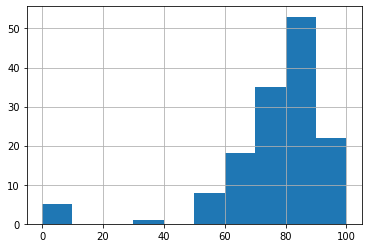

In [29]:
ds['FT%'].hist()  """""Looking at this we can see that most of the players do hit most of their free goals ""

In [31]:
ds3 = ds['FT%'].dropna()

In [35]:
std1 = ds['FT%'].dropna().std()
mean1 = ds['FT%'].dropna().mean()
a = 0.95
stats.norm.interval(a, loc=mean, scale=std)

(39.49868577462544, 112.15906070424776)

In [41]:
ttest_1samp(ds['FT%'].dropna(), 60)

Ttest_1sampResult(statistic=10.175942061238207, pvalue=1.4098701690383065e-18)

**What can you comment about our result? What would you tell your sister?**

In [15]:
""""I can see that there is quite a t-score of 10 which means there is of about 10% between the players the low p-value says
the low p-value says that the probablity is small which is good. If I look at the confidence interval it's weird
in this case while it goes over 100%. but I would say that 60% is the minimum to hit and it's below that.  


# Bonus: Can you plot the probability distribution of the proportion of missed free throws, indicating where the critical region is?

In [ ]:
#your code here

# Question 3: Is the average number of assists for WNBA players only higher than the average for WNBA and NBA players together?

Your brother-in-law is convinced that the average assists for female professional players is higher than the average of both female and male players combined (which is 52 for the 2016-2017 season). You would like to actually prove if this is true or not but you remember your stats teacher saying "you can't *prove* anything, you just can say that *you are not* saying foolishness".

**How would you do it? Try and think about the requirements that your sample must satisfy in order to do that. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [16]:
""""let's look at the data and if it is normally distributed for the females (we will assume that it's the same for the males)


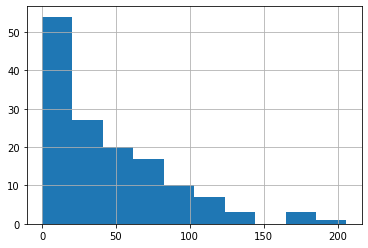

In [45]:
ds['AST'].hist() ### definetly not normally distrubuted, but we can do a onesided t-test. 

In [46]:
ds['AST'].dropna().describe() 

count    142.000000
mean      44.514085
std       41.490790
min        0.000000
25%       11.250000
50%       34.000000
75%       66.750000
max      206.000000
Name: AST, dtype: float64

**Use a two-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [65]:
mean3 = ds['AST'].dropna().mean()
std3 = ds['AST'].dropna().std()
a5 =0.05

In [66]:
ttest_1samp(ds['AST'].dropna(), 52)

Ttest_1sampResult(statistic=-2.1499947192482898, pvalue=0.033261541354107166)

In [67]:
stats.norm.interval(a5, loc=mean3, scale=std3)

(41.91233078129605, 47.11583823278846)

**Now use a one-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [70]:
a25 = 0.025
stats.norm.interval(a25, loc=mean3, scale=std3)

(43.21384689069638, 45.81432212338812)

In [ ]:
"""With 95% confidence interval we can say we can't prove him wrong with a 97,5% confidence interval we can't see 
we can prove him right. """

# Bonus: Can you plot the resulting t-distribution of both tests? Indicate where the is the critical region and where does your statistic fall.**

In [ ]:
#your code here

# Bonus: Satisfying your curiosity

You finally managed to solve your family's debates over basketball! While you were doing that you started to take an interest in the normal distribution.

You read that the normal distribution is present in a lot of natural phenomenons, like blood pressure, IQ, weight and height. If, for example, we could plot the distribution of the weights of every human on the planet right now it would have the shape of a normal distribution.

In light of this you would like to see if it's possible to check if the distribution of the weights of the WNBA players is a sample distribution that comes from a population that has a normal distribution, because theoretically this should be the case.

**How would you try to demonstrate that our sample fits a normal distribution? What kind of test would you use? Would you have to make any assumptions?**

In [22]:
#your-answer-here

In [19]:
# your code here

**What are your comments in regards to the results of the test?**

In [24]:
#your-answer-here